**Импорт библиотек**

In [1]:
import pandas as pd
import numpy as np
import random
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from matplotlib import rcParams

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [72]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
rcParams['figure.figsize'] = 10, 5
rcParams['font.family'] = 'serif'
plt.rcParams['figure.dpi'] = 80
palette = 'colorblind'
sns.set_palette(palette, 6)

**Пропуски и примеры абстрактов**

In [6]:
datadir = '/content/drive/MyDrive/Colab Notebooks/pet_projects/abstract_sum/data/' + 'cleanvkr.csv'
df = pd.read_csv(datadir)
print('Кол-во строк: ', df.shape[0])

Кол-во строк:  64860


In [7]:
df.head(2)

,vkrurl,title,abstract,title_wordcnt,abstract_wordcnt,title_length,abstract_length,level,learnProgram_title,rating,year
0,https://www.hse.ru/edu/vkr/206738445,Разработка веб-приложения для содания модели у...,В данной дипломной работе описывается разработ...,10,81,76,629,Бакалавриат,Информатика и вычислительная техника,NaN,2017
1,https://www.hse.ru/edu/vkr/153010267,Оценка эффективности активно и пассивно управл...,Выбор между активным и пассивным управлением я...,12,103,100,839,Бакалавриат,Экономика,NaN,2015


In [8]:
n = 2
for id in random.sample(list(df.index), n):
    print(f'vkrurl: {df[df.index == id]["vkrurl"][id]}, title: {df[df.index == id]["title"][id]}')
    print('abstract:')
    pprint(df[df.index == id]["abstract"][id], width = 140)
    print('----------------')

vkrurl: https://www.hse.ru/edu/vkr/153007849, title: Применение инструментов инвестиционного маркетинга в продвижении испанских компаний на латиноамериканских рынках
abstract:
('Аннотация К дипломной работе на тему «Применение инструментов инвестиционного маркетинга в продвижении испанских компаний на '
 'латиноамериканских рынках» Выполнена студенткой группы 462 факультета МЭиМП Национального исследовательского университета «Высшая Школа '
 'Экономики» Мамаевой Владиславой Романовной Объектом исследования выпускной квалификационной работы выступают тенденции развития '
 'коммерческих отношений между странами Латинской Америки и Испанией в контексте базовых принципов концепции промышленного маркетинга. '
 'Предмет дипломной работы- это инвестиционная деятельность и стратегическое планирование испанских транснациональных корпораций, в основе '
 'которых лежит применение инструментария инвестиционного маркетинга. Целью данной работы является анализ бизнес и инвестиционной '
 'активности 

In [9]:
round(df.isnull().sum()/df.shape[0]*100)

vkrurl                 0.0
title                  0.0
abstract               0.0
title_wordcnt          0.0
abstract_wordcnt       0.0
title_length           0.0
abstract_length        0.0
level                  0.0
learnProgram_title     5.0
rating                77.0
year                   0.0
dtype: float64

**Общие графики**

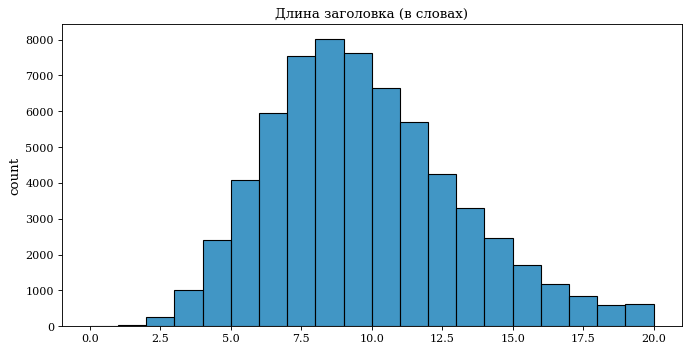

In [73]:
name = 'Длина заголовка (в словах)'
col = 'title_wordcnt'
qua = 0.99
quantile = np.quantile(df[col], qua)
df1 = df[df[col] <= quantile]

ax = sns.histplot(df1, x=col, binrange = [0, max(df1[col])], bins=len(set(df1[col])))
ax.set_title(name, fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('count', fontsize=12)
ax.tick_params(labelsize=10)

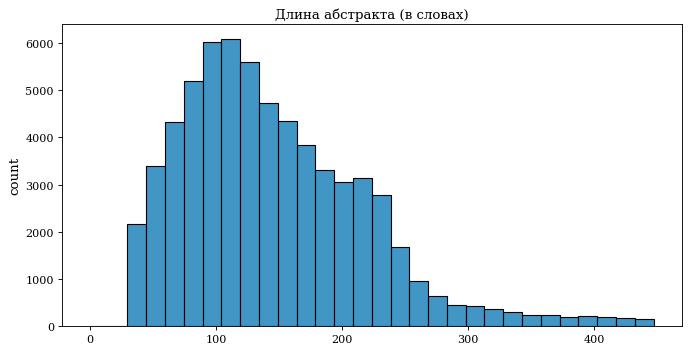

In [74]:
name = 'Длина абстракта (в словах)'
col = 'abstract_wordcnt'
qua = 0.99
quantile = np.quantile(df[col], qua)
df1 = df[df[col] <= quantile]

ax = sns.histplot(df1, x=col, binrange = [0, max(df1[col])], bins=30)
ax.set_title(name, fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('count', fontsize=12)
ax.tick_params(labelsize=10)

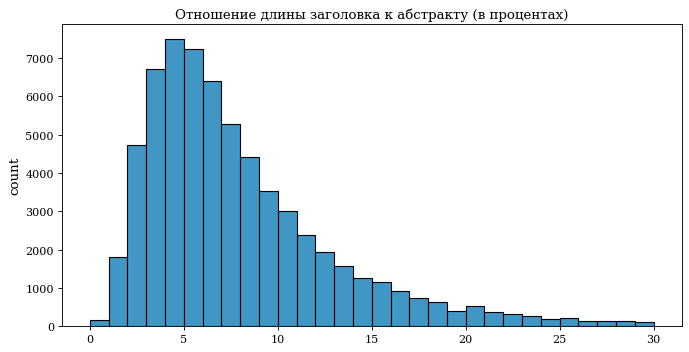

In [75]:
name = 'Отношение длины заголовка к абстракту (в процентах)'
df1 = df.copy()
col = 'prop'
df1[col] = df1['title_wordcnt']/df1['abstract_wordcnt']*100
qua = 0.99
quantile = np.quantile(df1[col], qua)
df1 = df1[df1[col] <= quantile]


ax = sns.histplot(df1, x=col, binrange = [0, max(df1[col])], bins=30)
ax.set_title(name, fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('count', fontsize=12)
ax.tick_params(labelsize=10)

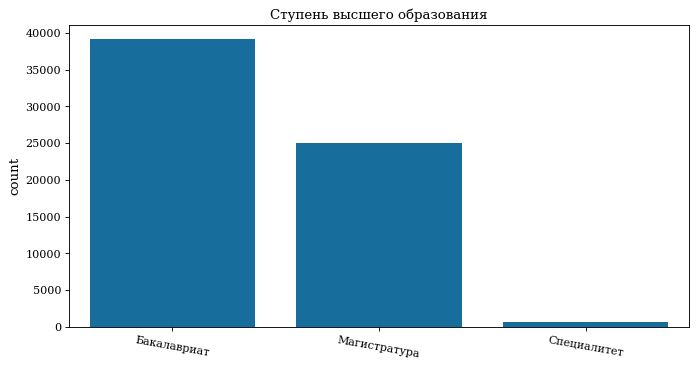

In [76]:
name = 'Ступень высшего образования'
col = 'level'
df1 = df

plt.xticks(rotation=-10)
ax = sns.countplot(x=col, data=df1, order = df1[col].value_counts().iloc[:25].index, 
                   color=sns.color_palette(palette, 6).as_hex()[0])
ax.set_title(name, fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('count', fontsize=12)
ax.tick_params(labelsize=10)

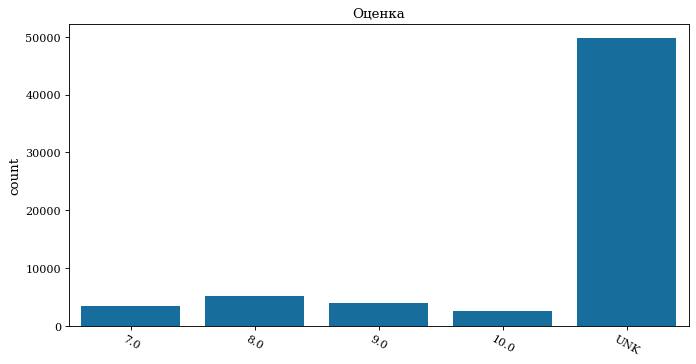

In [80]:
name = 'Оценка'
col = 'rating'
df1 = df.copy()
df1 = df1.fillna('UNK')

plt.xticks(rotation=-30)
ax = sns.countplot(x=col, data=df1, order = list(set(df1[col])),
                   color=sns.color_palette(palette, 6).as_hex()[0])
ax.xaxis.set_ticklabels([i.get_text()[:12] for i in ax.xaxis.get_ticklabels()])
ax.set_title(name, fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('count', fontsize=12)
ax.tick_params(labelsize=10)

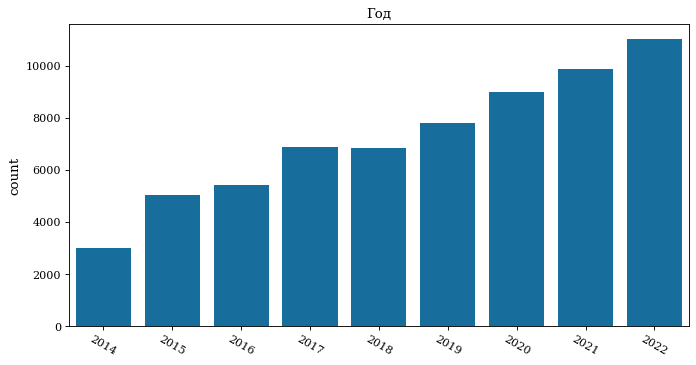

In [86]:
name = 'Год'
col = 'year'
df1 = df.copy()

plt.xticks(rotation=-30)
ax = sns.countplot(x=col, data=df1, order = sorted(list(set(df1[col]))),
                   color=sns.color_palette(palette, 6).as_hex()[0])
ax.xaxis.set_ticklabels([i.get_text()[:12] for i in ax.xaxis.get_ticklabels()])
ax.set_title(name, fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('count', fontsize=12)
ax.tick_params(labelsize=10)

**Графики по программам**

In [82]:
df1 = df.copy()
df1['prop'] = df1['title_wordcnt']/df1['abstract_wordcnt']*100
dfagg = df1.dropna(subset=['learnProgram_title'])\
                .groupby('learnProgram_title')\
                .agg({'vkrurl': 'nunique', 'title_wordcnt': 'mean', 
                      'abstract_wordcnt': 'mean', 'rating': 'mean',
                      'prop': 'mean'})\
                .rename(columns = {'vkrurl': 'vkrcnt'})\
                .reset_index()
print('Всего программ:', dfagg.shape[0])
dfagg = dfagg[dfagg['vkrcnt'] >= 30]
print('Всего достаточно больших программ:', dfagg.shape[0])

Всего программ: 312
Всего достаточно больших программ: 220


In [83]:
dfagg.sort_values('vkrcnt', ascending=False).head(2)

,learnProgram_title,vkrcnt,title_wordcnt,abstract_wordcnt,rating,prop
287,Экономика,4472,8.639535,147.451252,8.205102,7.065734
120,Менеджмент,3534,8.701471,155.183645,8.111111,6.740680


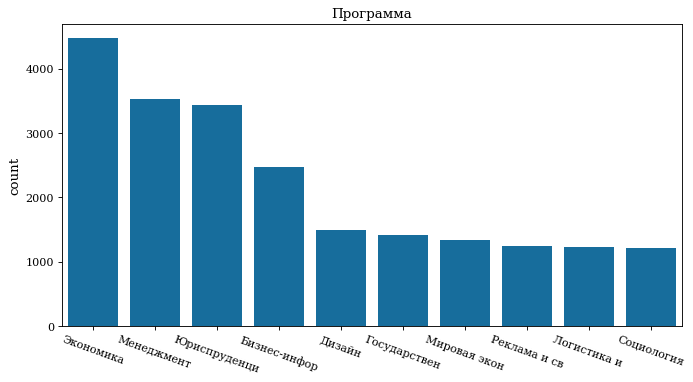

In [87]:
df1 = dfagg.copy()
name = 'Программа'
col = 'vkrcnt'
df1 = df1.sort_values(col, ascending=False).head(10)

plt.xticks(rotation=-20)
ax = sns.barplot(x='learnProgram_title', y=col, data=df1, 
                 color=sns.color_palette(palette, 6).as_hex()[0])
ax.xaxis.set_ticklabels([i.get_text()[:12] for i in ax.xaxis.get_ticklabels()])
ax.set_title(name, fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('count', fontsize=12)
ax.tick_params(labelsize=10)

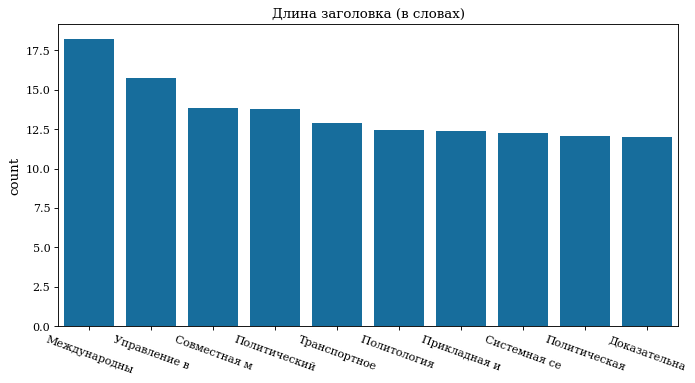

In [92]:
df1 = dfagg.copy()
name = 'Длина заголовка (в словах)'
col = 'title_wordcnt'
df1 = df1.sort_values(col, ascending=False).head(10)

plt.xticks(rotation=-20)
ax = sns.barplot(x='learnProgram_title', y=col, data=df1, 
                 color=sns.color_palette(palette, 6).as_hex()[0])
ax.xaxis.set_ticklabels([i.get_text()[:12] for i in ax.xaxis.get_ticklabels()])
ax.set_title(name, fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('count', fontsize=12)
ax.tick_params(labelsize=10)

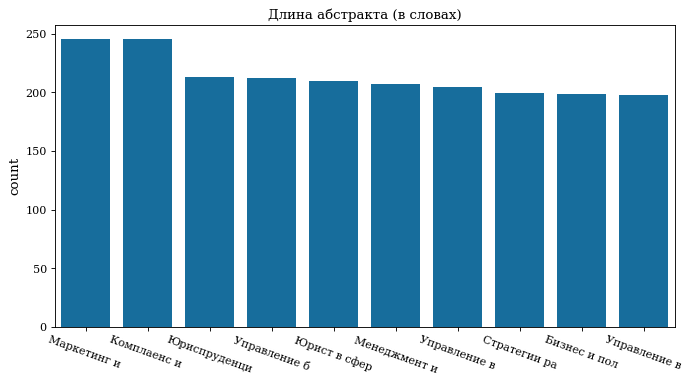

In [93]:
df1 = dfagg.copy()
name = 'Длина абстракта (в словах)'
col = 'abstract_wordcnt'
df1 = df1.sort_values(col, ascending=False).head(10)

plt.xticks(rotation=-20)
ax = sns.barplot(x='learnProgram_title', y=col, data=df1, 
                 color=sns.color_palette(palette, 6).as_hex()[0])
ax.xaxis.set_ticklabels([i.get_text()[:12] for i in ax.xaxis.get_ticklabels()])
ax.set_title(name, fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('count', fontsize=12)
ax.tick_params(labelsize=10)

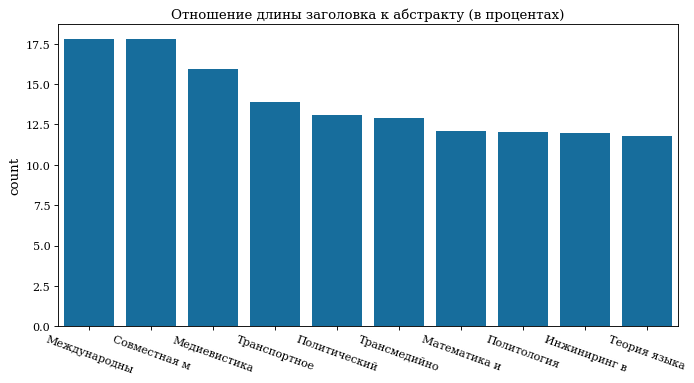

In [96]:
df1 = dfagg.copy()
name = 'Отношение длины заголовка к абстракту (в процентах)'
col = 'prop'
df1 = df1.sort_values(col, ascending=False).head(10)

plt.xticks(rotation=-20)
ax = sns.barplot(x='learnProgram_title', y=col, data=df1, 
                 color=sns.color_palette(palette, 6).as_hex()[0])
ax.xaxis.set_ticklabels([i.get_text()[:12] for i in ax.xaxis.get_ticklabels()])
ax.set_title(name, fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('count', fontsize=12)
ax.tick_params(labelsize=10)

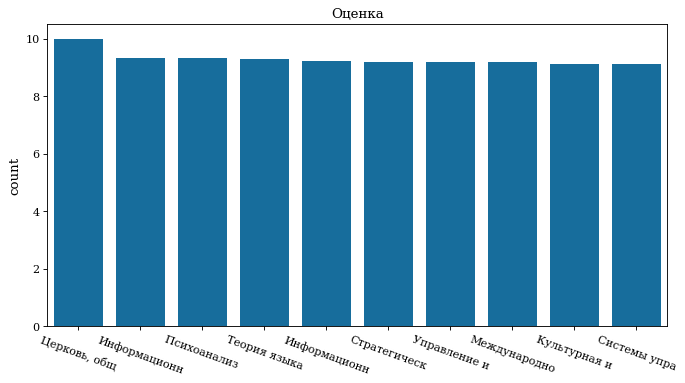

In [94]:
df1 = dfagg.copy()
name = 'Оценка'
col = 'prop'
df1 = df1.sort_values(col, ascending=False).head(10)

plt.xticks(rotation=-20)
ax = sns.barplot(x='learnProgram_title', y=col, data=df1, 
                 color=sns.color_palette(palette, 6).as_hex()[0])
ax.xaxis.set_ticklabels([i.get_text()[:12] for i in ax.xaxis.get_ticklabels()])
ax.set_title(name, fontsize=12)
ax.set_xlabel('', fontsize=12)
ax.set_ylabel('count', fontsize=12)
ax.tick_params(labelsize=10)